In [1]:
!pip install easyocr
!pip install imutils

In [2]:
import cv2
from matplotlib import pyplot as plt
import easyocr
import numpy as np
import easyocr
import imutils

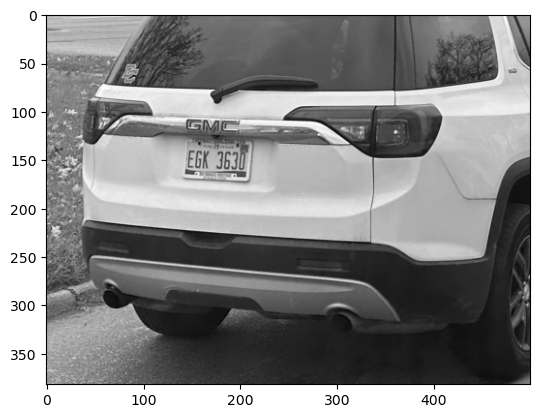

In [3]:
img = cv2.imread("../assets/image3.jpeg")
img = imutils.resize(img, width=500)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
plt.imshow(gray, cmap='gray')

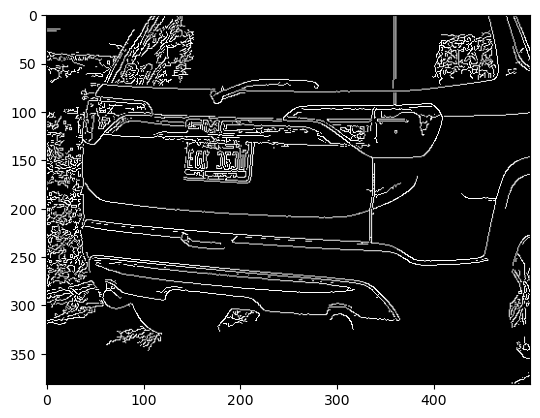

In [4]:
filtered_img = cv2.bilateralFilter(gray, 20,35,55)
edges = cv2.Canny(filtered_img, 10 ,50)
plt.imshow(edges, cmap='gray')

In [5]:
keypoints = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [6]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [7]:
location

array([[[212, 133]],

       [[208, 171]],

       [[164, 165]],

       [[205, 168]]], dtype=int32)

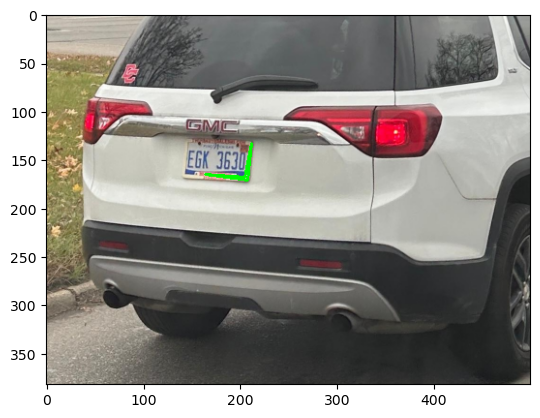

In [8]:
new_img = cv2.drawContours(img, [location], -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

In [9]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

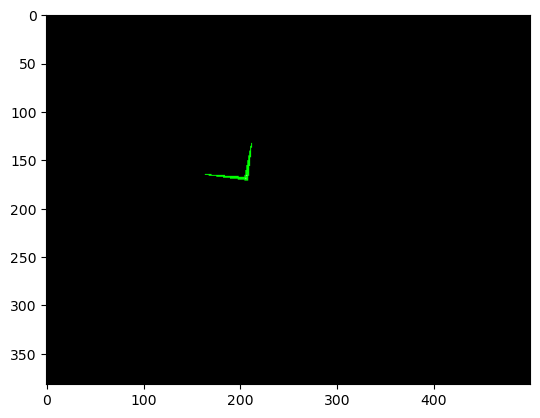

In [10]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

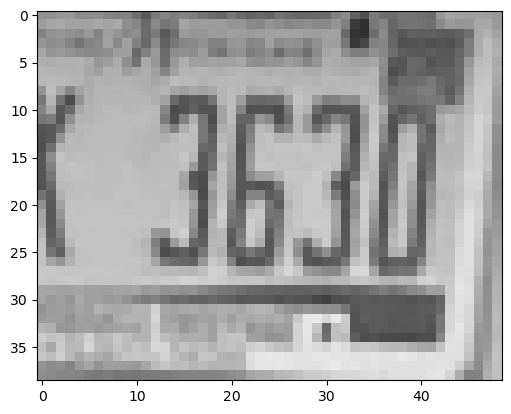

In [11]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

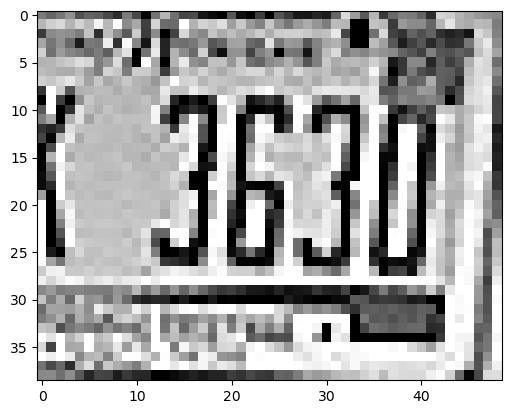

In [12]:

kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpened_image = cv2.filter2D(cropped_image, -1, kernel)

plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))

In [13]:
reader = easyocr.Reader(['en'])
result = reader.readtext(sharpened_image)
result

[([[0, 6], [46, 6], [46, 30], [0, 30]], "'3638", 0.1745749789561752)]

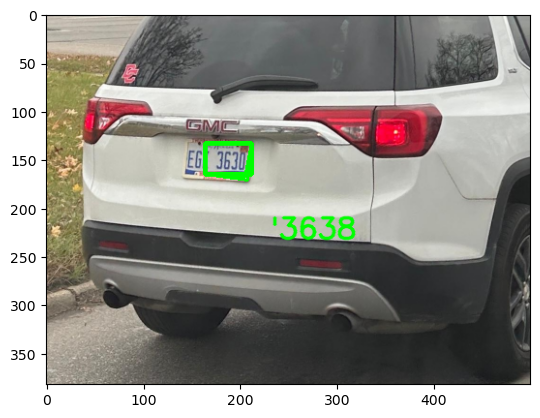

In [14]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0]+20, approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))